# Predicting Patients Survival

## Objective
Develop a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

## Dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment.
Survived_1_year == 1, implies that the patient survived after 1 year of treatment.

### Data Description:

* ID_Patient_Care_Situation: Care situation of a patient during treatment
* Diagnosed_Condition: The diagnosed condition of the patient
* ID_Patient: Patient identifier number
* Treatment_with_drugs: Class of drugs used during treatment
* Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
* Patient_Age: Age of the patient
* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
* Patient_Smoker: If the patient was a smoker or not
* Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
* Previous_Condition: Condition of the patient before the start of the treatment 
(This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case.)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [2]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [3]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


# Data Cleaning

In [4]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [5]:
pharma_data.isnull().mean() * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

In [6]:
# filling missing values with mode

columns = ['Treated_with_drugs', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']

for i in columns:
  pharma_data[i].fillna(pharma_data[i].mode()[0], inplace=True)

In [7]:
pharma_data.isnull().mean() * 100

ID_Patient_Care_Situation    0.0
Diagnosed_Condition          0.0
Patient_ID                   0.0
Treated_with_drugs           0.0
Patient_Age                  0.0
Patient_Body_Mass_Index      0.0
Patient_Smoker               0.0
Patient_Rural_Urban          0.0
Patient_mental_condition     0.0
A                            0.0
B                            0.0
C                            0.0
D                            0.0
E                            0.0
F                            0.0
Z                            0.0
Number_of_prev_cond          0.0
Survived_1_year              0.0
dtype: float64

In [8]:
# changing object to str

pharma_data[['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban']] = pharma_data[['Treated_with_drugs', 
                                                                          'Patient_Smoker', 'Patient_Rural_Urban']].astype('string')

In [9]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  string 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  string 
 7   Patient_Rural_Urban        23097 non-null  string 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [10]:
# checking typos

cate = ['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']
for i in cate:
  print(pharma_data[i].unique())

<StringArray>
[                 'DX6',                 'DX2 ',                 'DX1 ',
                 'DX3 ',                 'DX5 ',                 'DX4 ',
             'DX2 DX5 ',             'DX2 DX3 ',             'DX1 DX3 ',
             'DX1 DX2 ',             'DX3 DX4 ',             'DX1 DX4 ',
             'DX1 DX5 ',         'DX2 DX4 DX5 ',         'DX1 DX2 DX3 ',
             'DX3 DX5 ',             'DX2 DX4 ',         'DX3 DX4 DX5 ',
         'DX2 DX3 DX5 ',     'DX1 DX2 DX3 DX4 ',             'DX4 DX5 ',
         'DX2 DX3 DX4 ',         'DX1 DX4 DX5 ',         'DX1 DX2 DX4 ',
         'DX1 DX3 DX5 ',         'DX1 DX2 DX5 ',         'DX1 DX3 DX4 ',
     'DX1 DX3 DX4 DX5 ',     'DX1 DX2 DX4 DX5 ',     'DX2 DX3 DX4 DX5 ',
     'DX1 DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 DX5 ']
Length: 32, dtype: string
<StringArray>
['YES', 'NO', 'Cannot say']
Length: 3, dtype: string
<StringArray>
['URBAN', 'RURAL']
Length: 2, dtype: string
['Stable']


In [11]:
# dropping columns I wont use

pharma_data.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition'], axis=1, inplace=True)

In [12]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Treated_with_drugs       23097 non-null  string 
 2   Patient_Age              23097 non-null  int64  
 3   Patient_Body_Mass_Index  23097 non-null  float64
 4   Patient_Smoker           23097 non-null  string 
 5   Patient_Rural_Urban      23097 non-null  string 
 6   A                        23097 non-null  float64
 7   B                        23097 non-null  float64
 8   C                        23097 non-null  float64
 9   D                        23097 non-null  float64
 10  E                        23097 non-null  float64
 11  F                        23097 non-null  float64
 12  Z                        23097 non-null  float64
 13  Number_of_prev_cond      23097 non-null  float64
 14  Survived_1_year       

## Exploratory Analysis

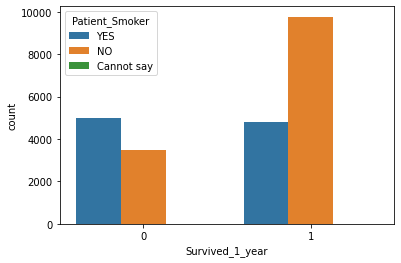

In [13]:
sns.countplot(x=pharma_data['Survived_1_year'], hue=pharma_data['Patient_Smoker'])

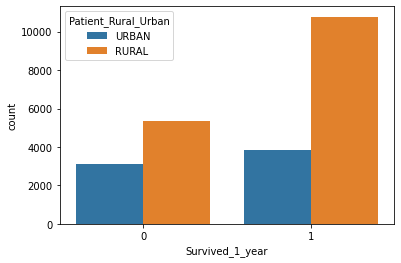

In [14]:
sns.countplot(x=pharma_data['Survived_1_year'], hue=pharma_data['Patient_Rural_Urban'])

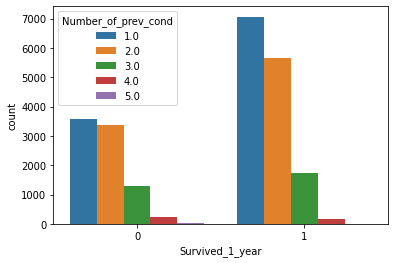

In [15]:
sns.countplot(x=pharma_data['Survived_1_year'], hue=pharma_data['Number_of_prev_cond'])

In [16]:
pharma_data['Treated_with_drugs'].value_counts()

DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: Int64

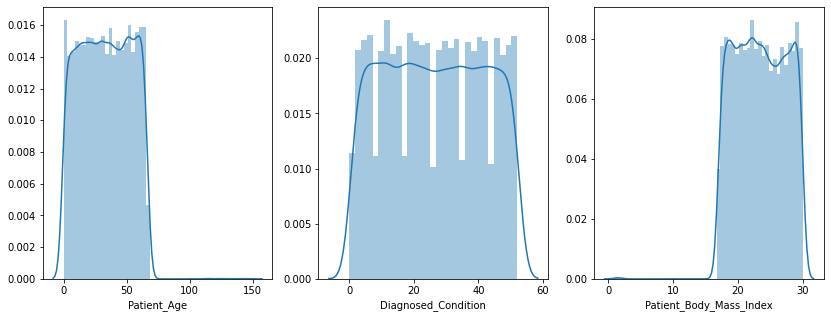

In [28]:
plt.figure(figsize=(14,5))

plt.subplot(1, 3, 1)
sns.distplot(pharma_data['Patient_Age'])

plt.subplot(1, 3, 2)
sns.distplot(pharma_data['Diagnosed_Condition'])

plt.subplot(1, 3, 3)
sns.distplot(pharma_data['Patient_Body_Mass_Index'])

## Feature Engineering

In [31]:
#df_dum = pd.get_dummies(data=pharma_data, columns=['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban'])

In [32]:
#df_dum

The above method creates way too many dummy variables for the data. So we should create the dummies by combining the values to genetare multiple '1's, by treating the column as a Pandas Series object and performing str operations.

In [33]:
df_dum = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ')

In [35]:
new_df = pd.concat([pharma_data, df_dum], axis=1)
new_df

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
1,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,0,DX6,128,1.348400,Cannot say,RURAL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,3,DX2 DX4,14,18.643448,NO,RURAL,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0,0,1,0,1,0,0
23093,41,DX6,55,23.684585,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
23094,24,DX6,63,27.500039,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
23095,11,DX3,25,23.719125,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,1,0,0,0


In [51]:
le = LabelEncoder()
new_df.Patient_Smoker = le.fit_transform(new_df.Patient_Smoker)
new_df.Patient_Rural_Urban = le.fit_transform(new_df.Patient_Rural_Urban)
new_df.drop('Treated_with_drugs', axis=1, inplace=True)
new_df.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,8,56,18.479385,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
1,5,36,22.945566,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,48,27.510027,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,5,19.130976,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,0,128,1.348400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1


## Spliting train/testing data

In [52]:
# defining input and output variables

X = new_df.drop('Survived_1_year', axis=1)
y = new_df['Survived_1_year']

In [53]:
# spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training and Evaluating Different Models

### 1) Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, lr_pred)
auc_roc_lr = roc_auc_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)
print("Accuracy score of the LR model is: {}".format(accuracy_lr))
print("roc_auc_score of the LR model is: {}".format(auc_roc_lr))
print("F1 score of the LR model is: {}".format(f1_lr))

Accuracy score of the LR model is: 0.7217893217893218
roc_auc_score of the LR model is: 0.6706565014603881
F1 score of the LR model is: 0.7970098968203833


### 2) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, dtc_pred)
auc_roc_dtc = roc_auc_score(y_test, dtc_pred)
f1_dtc = f1_score(y_test, dtc_pred)
print("Accuracy score of the DTC model is: {}".format(accuracy_dtc))
print("roc_auc_score of the DTC model is: {}".format(auc_roc_dtc))
print("F1 score of the DTC model is: {}".format(f1_dtc))

Accuracy score of the DTC model is: 0.7655122655122655
roc_auc_score of the DTC model is: 0.7490138579673827
F1 score of the DTC model is: 0.8141795311606634


### 3) Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
rfc_pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_pred)
auc_roc_rfc = roc_auc_score(y_test, rfc_pred)
f1_rfc = f1_score(y_test, rfc_pred)
print("Accuracy score of the RFC model is: {}".format(accuracy_rfc))
print("roc_auc_score of the RFC model is: {}".format(auc_roc_rfc))
print("F1 score of the RFC model is: {}".format(f1_rfc))

Accuracy score of the RFC model is: 0.8184704184704185
roc_auc_score of the RFC model is: 0.7994419822349574
F1 score of the RFC model is: 0.8587151841868823


## Improving the Model

### Hyperparameter(s) Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

params_to_test = {
    'n_estimators':[10,50,100,200],
    'max_depth':[6,10,15]
}

# here you can put any parameter you want at every run, like random_state or verbosity
rf_model = RandomForestClassifier(random_state=42)

# here you specify the CV parameters, number of folds, numberof cores to use...
grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 

#best_params is a dict you can pass directly to train a model with optimal settings 
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rfc_new_pred = best_model.predict(X_test)

accuracy_rfc_new = accuracy_score(y_test, rfc_new_pred)
auc_roc_rfc_new = roc_auc_score(y_test, rfc_new_pred)
f1_rfc_new = f1_score(y_test, rfc_new_pred)
print("Accuracy score of the New RFC model is: {}".format(accuracy_rfc_new))
print("roc_auc_score of the New RFC model is: {}".format(auc_roc_rfc_new))
print("F1 score of the New RFC model is: {}".format(f1_rfc_new))

Accuracy score of the New RFC model is: 0.8261183261183261
roc_auc_score of the New RFC model is: 0.8024038840590993
F1 score of the New RFC model is: 0.8665707009190566


## Feature Selection

### Recursive Feature Elimination

In [68]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= best_model , step = 1)

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [ True  True  True  True  True False False False  True False False False
  True False False False False  True  True]
Feature Ranking: [ 1  1  1  1  1  2  8  7  1  5 10 11  1  4  9  6  3  1  1]


In [69]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
12,Number_of_prev_cond,1
17,DX5,1
8,D,1
18,DX6,1
3,Patient_Smoker,1
2,Patient_Body_Mass_Index,1
1,Patient_Age,1
4,Patient_Rural_Urban,1
5,A,2


In [71]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
rfc_new_rfe_model = best_model.fit(X_train_rfe, y_train)

In [72]:
y_pred_rfe = rfc_new_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_roc_auc = roc_auc_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model ROC-AUC Score:", rfe_roc_auc)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.8082251082251082
RFE Model ROC-AUC Score: 0.7885332695175036
RFE Model F1 Score: 0.8506909336029659


## Overall performance

In [121]:
model = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier (RFC)', 'RFC (hyperparameters tuning)', 'Feature Selection (RFE)']
F1Score = [f1_lr, f1_dtc, f1_rfc, f1_rfc_new, rfe_fscore]
accuracy = [accuracy_lr, accuracy_dtc, accuracy_rfc, accuracy_rfc_new, rfe_ac]
performance = pd.DataFrame({'Model': model,
                            'F1-Score': F1Score,
                            'Accuracy': accuracy})

performance.sort_values(by='F1-Score')

,Model,F1-Score,Accuracy
0,Logistic Regression,0.797010,0.721789
1,Decision Tree Classifier,0.814180,0.765512
4,Feature Selection (RFE),0.850691,0.808225
2,Random Forest Classifier (RFC),0.858715,0.818470
3,RFC (hyperparameters tuning),0.866571,0.826118


## Using test data for the Bootcamp Assignment 

In [76]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [77]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [79]:
# changing object to str

test_new[['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban']] = test_new[['Treated_with_drugs', 
                                                                          'Patient_Smoker', 'Patient_Rural_Urban']].astype('string')

In [80]:
# dropping columns I wont use

test_new.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition'], axis=1, inplace=True)

In [81]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      9303 non-null   int64  
 1   Treated_with_drugs       9303 non-null   string 
 2   Patient_Age              9303 non-null   int64  
 3   Patient_Body_Mass_Index  9303 non-null   float64
 4   Patient_Smoker           9303 non-null   string 
 5   Patient_Rural_Urban      9303 non-null   string 
 6   A                        9303 non-null   float64
 7   B                        9303 non-null   float64
 8   C                        9303 non-null   float64
 9   D                        9303 non-null   float64
 10  E                        9303 non-null   float64
 11  F                        9303 non-null   float64
 12  Z                        9303 non-null   float64
 13  Number_of_prev_cond      9303 non-null   float64
dtypes: float64(9), int64(2),

In [82]:
# encoding

test_enc = test_new['Treated_with_drugs'].str.get_dummies(sep=' ')
test_enc = pd.concat([test_new, test_enc], axis=1)

le = LabelEncoder()
test_enc.Patient_Smoker = le.fit_transform(test_enc.Patient_Smoker)
test_enc.Patient_Rural_Urban = le.fit_transform(test_enc.Patient_Rural_Urban)
test_enc.drop('Treated_with_drugs', axis=1, inplace=True)
test_enc.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,40,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,52,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,50,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,32,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,20,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [96]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      9303 non-null   int64  
 1   Patient_Age              9303 non-null   int64  
 2   Patient_Body_Mass_Index  9303 non-null   float64
 3   Patient_Smoker           9303 non-null   int64  
 4   Patient_Rural_Urban      9303 non-null   int64  
 5   A                        9303 non-null   float64
 6   B                        9303 non-null   float64
 7   C                        9303 non-null   float64
 8   D                        9303 non-null   float64
 9   E                        9303 non-null   float64
 10  F                        9303 non-null   float64
 11  Z                        9303 non-null   float64
 12  Number_of_prev_cond      9303 non-null   float64
 13  DX1                      9303 non-null   int64  
 14  DX2                     

In [103]:
# predicting new values with Random Forest Model

survived_rfc = rfc.predict(test_enc)

In [100]:
# predicting new values with Random Forest after Hyperparameters tuning

survived_best_model = best_model.predict(test_enc)

In [104]:
# saving predictions

predicted_rfc = pd.DataFrame(survived_rfc)
predicted_rfc.index = test_new.index
predicted_rfc.columns = ['Survived_1_Year']

predicted_best_model = pd.DataFrame(survived_best_model)
predicted_best_model.index = test_new.index
predicted_best_model.columns = ['Survived_1_Year']

# from google.colab import files
# predicted_best_model.to_excel('predictions_patient_survived.xlsx')
# files.download('predictions_patient_survived.xlsx')

# predicted_rfc.to_excel('predictions_patient_survived.xlsx')
# files.download('predictions_patient_survived.xlsx')